# Leer datos

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/items_titles.csv')

df

,ITE_ITEM_TITLE
0,Tênis Ascension Posh Masculino - Preto E Verme...
1,Tenis Para Caminhada Super Levinho Spider Corr...
2,Tênis Feminino Le Parc Hocks Black/ice Origina...
3,Tênis Olympikus Esportivo Academia Nova Tendên...
4,Inteligente Led Bicicleta Tauda Luz Usb Bicicl...
...,...
29995,Tênis Vans Old Skool I Love My Vans - Usado - ...
29996,Tênis Feminino Preto Moleca 5296155
29997,Tenis Botinha Com Pelo Via Marte Original Lanç...
29998,Tênis Slip On Feminino Masculino Original Sapa...


In [17]:
import unicodedata

# Función para limpiar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar acentos
    text = ''.join(
        char for char in unicodedata.normalize('NFKD', text) if not unicodedata.combining(char)
    )
    return text

# Aplicar la limpieza a la columna 'ITE_ITEM_TITLE'
df['cleaned_title'] = df['ITE_ITEM_TITLE'].apply(preprocess_text)

# Mostrar los primeros resultados
print("Primeros registros después de la limpieza:")
print(df[['ITE_ITEM_TITLE', 'cleaned_title']].head())

Primeros registros después de la limpieza:
                                      ITE_ITEM_TITLE  \
0  Tênis Ascension Posh Masculino - Preto E Verme...   
1  Tenis Para Caminhada Super Levinho Spider Corr...   
2  Tênis Feminino Le Parc Hocks Black/ice Origina...   
3  Tênis Olympikus Esportivo Academia Nova Tendên...   
4  Inteligente Led Bicicleta Tauda Luz Usb Bicicl...   

                                       cleaned_title  
0  tenis ascension posh masculino - preto e verme...  
1  tenis para caminhada super levinho spider corr...  
2  tenis feminino le parc hocks black/ice origina...  
3  tenis olympikus esportivo academia nova tenden...  
4  inteligente led bicicleta tauda luz usb bicicl...  


# Tokenización.

In [18]:
import re

# Función para tokenizar con eliminación de puntuación
def tokenize_with_re(text):
    # Dividir en palabras ignorando puntuación
    return re.findall(r'\b\w+\b', text)

# Aplicar tokenización con re
df['tokens'] = df['cleaned_title'].apply(tokenize_with_re)

# Mostrar los primeros resultados
print("Primeros registros después de la tokenización:")
print(df[['cleaned_title', 'tokens']].head())

Primeros registros después de la tokenización:
                                       cleaned_title  \
0  tenis ascension posh masculino - preto e verme...   
1  tenis para caminhada super levinho spider corr...   
2  tenis feminino le parc hocks black/ice origina...   
3  tenis olympikus esportivo academia nova tenden...   
4  inteligente led bicicleta tauda luz usb bicicl...   

                                              tokens  
0  [tenis, ascension, posh, masculino, preto, e, ...  
1  [tenis, para, caminhada, super, levinho, spide...  
2  [tenis, feminino, le, parc, hocks, black, ice,...  
3  [tenis, olympikus, esportivo, academia, nova, ...  
4  [inteligente, led, bicicleta, tauda, luz, usb,...  


Se identifica que los productos están en portugués.

In [19]:
from collections import Counter

# Unir todas las palabras en una lista
all_words = [word for tokens in df['tokens'] for word in tokens]

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words)

# Obtener las 10 palabras más frecuentes
most_common_words = word_counts.most_common(10)

print("Palabras más frecuentes:")
print(most_common_words)

Palabras más frecuentes:
[('tenis', 22600), ('feminino', 7931), ('masculino', 5349), ('casual', 3757), ('preto', 3664), ('infantil', 3496), ('original', 2766), ('sapatenis', 2630), ('bicicleta', 2248), ('de', 1928)]


In [20]:
from nltk import ngrams

# Función para generar n-gramas
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Crear n-gramas (bi-gramas y tri-gramas)
df['bigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['tokens'].apply(lambda x: generate_ngrams(x, 3))

# Contar los bigramas más comunes
all_bigrams = [bigram for bigrams in df['bigrams'] for bigram in bigrams]
bigram_counts = Counter(all_bigrams)

# Contar los trigramas más comunes
all_trigrams = [trigram for trigrams in df['trigrams'] for trigram in trigrams]
trigram_counts = Counter(all_trigrams)

print("Bigrams más frecuentes:")
print(bigram_counts.most_common(10))

print("Trigrams más frecuentes:")
print(trigram_counts.most_common(10))

Bigrams más frecuentes:
[(('tenis', 'feminino'), 3560), (('tenis', 'infantil'), 1852), (('tenis', 'masculino'), 1562), (('slip', 'on'), 1292), (('tenis', 'olympikus'), 900), (('tenis', 'casual'), 889), (('tenis', 'usthemp'), 752), (('bicicleta', 'aro'), 683), (('feminino', 'casual'), 675), (('sapatenis', 'masculino'), 669)]
Trigrams más frecuentes:
[(('tenis', 'feminino', 'casual'), 472), (('bicicleta', 'aro', '29'), 350), (('tenis', 'slip', 'on'), 347), (('tenis', 'infantil', 'feminino'), 326), (('tenis', 'casual', 'feminino'), 274), (('tenis', 'infantil', 'masculino'), 213), (('feminino', 'slip', 'on'), 177), (('tenis', 'new', 'balance'), 174), (('tenis', 'asics', 'gel'), 169), (('bicicleta', 'aro', '26'), 168)]


Longitud promedio de tokens por título: 7.26
Longitud máxima: 28
Longitud mínima: 1


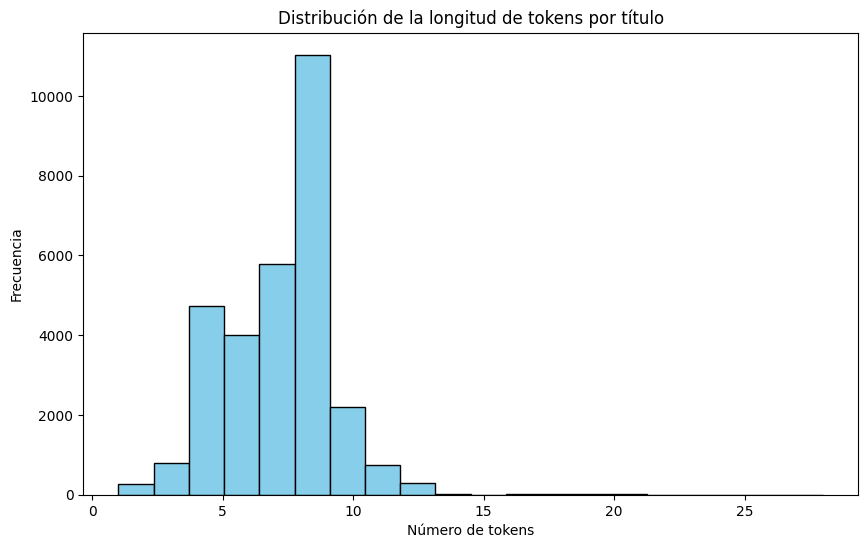

In [21]:
import matplotlib.pyplot as plt

# Longitud de cada título
df['num_tokens'] = df['tokens'].apply(len)

# Estadísticas descriptivas
mean_tokens = df['num_tokens'].mean()
max_tokens = df['num_tokens'].max()
min_tokens = df['num_tokens'].min()

print(f"Longitud promedio de tokens por título: {mean_tokens:.2f}")
print(f"Longitud máxima: {max_tokens}")
print(f"Longitud mínima: {min_tokens}")

# Graficar la distribución de la longitud
plt.figure(figsize=(10, 6))
plt.hist(df['num_tokens'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de la longitud de tokens por título")
plt.xlabel("Número de tokens")
plt.ylabel("Frecuencia")
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir los tokens a texto limpio nuevamente
df['cleaned_text'] = df['tokens'].apply(lambda x: ' '.join(x))

# Crear la matriz TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Obtener palabras clave con TF-IDF más alto para el primer título
feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix[0].T.todense().tolist()
keywords = [(feature_names[i], score[0]) for i, score in enumerate(tfidf_scores) if score[0] > 0]
keywords = sorted(keywords, key=lambda x: x[1], reverse=True)

print("Palabras clave para el primer título según TF-IDF:")
print(keywords[:10])

Palabras clave para el primer título según TF-IDF:
[('posh', 0.721082244027785), ('ascension', 0.5175967363443497), ('vermelho', 0.35395186159292946), ('preto', 0.21157025669009114), ('masculino', 0.18529157128848214), ('tenis', 0.08807471624686453)]


### Análisis de Títulos:

1. **Palabras más frecuentes**:
   - Identificar términos comunes como `tenis` (22,600 apariciones) o `feminino` (7,931) nos permite detectar patrones generales en los productos.
   - Estas palabras frecuentes pueden no ser útiles directamente para medir similitud, ya que están presentes en muchos títulos, pero ayudan a filtrar palabras no relevantes.

2. **Bigramas y Trigramas más frecuentes**:
   - Frases clave como `tenis feminino casual` y `bicicleta aro 29` destacan categorías y características específicas de los productos.
   - Estas combinaciones pueden ser valiosas para crear representaciones más específicas de los títulos y mejorar la detección de similitudes.

3. **Estadísticas descriptivas**:
   - La longitud promedio de 7.26 tokens por título indica que los textos son concisos, lo que favorece la eficiencia al calcular similitudes.
   - Las longitudes máxima y mínima (28 y 1 tokens, respectivamente) sugieren la necesidad de manejar casos extremos, como títulos muy cortos o detallados, en la comparación.

4. **Palabras clave según TF-IDF**:
   - Términos con altos puntajes como `posh` y `ascension` indican elementos únicos que pueden ser cruciales para identificar productos similares.
   - Palabras con puntajes bajos (`tenis`, `masculino`) son menos útiles para diferenciar productos.

**Conclusión (En el contexto del reto)**:
- Este análisis permite priorizar características clave de los títulos (e.g., bigramas y trigramas únicos) para calcular similitudes entre productos.
- El uso de TF-IDF es una opción viable para representar títulos y calcular similitudes basadas en coseno o distancias.
- La eficiencia en tiempo de ejecución dependerá de optimizaciones en el algoritmo y la elección de estructuras de datos escalables.

# Eliminar Stop-words.

In [23]:
from nltk.corpus import stopwords
import nltk

# Descargar stop words si no están disponibles
nltk.download('stopwords')

# Combinar stop words en portugués
stop_words_pt = set(stopwords.words('portuguese'))


# Función para eliminar stop words de múltiples idiomas
def remove_multilang_stopwords(tokens):
    return [word for word in tokens if word not in stop_words_pt]

# Aplicar la función a los tokens
df['filtered_tokens'] = df['tokens'].apply(remove_multilang_stopwords)

# Verificar resultados
print("Primeros registros sin stop words:")
print(df[['tokens', 'filtered_tokens']].head())

Primeros registros sin stop words:
                                              tokens  \
0  [tenis, ascension, posh, masculino, preto, e, ...   
1  [tenis, para, caminhada, super, levinho, spide...   
2  [tenis, feminino, le, parc, hocks, black, ice,...   
3  [tenis, olympikus, esportivo, academia, nova, ...   
4  [inteligente, led, bicicleta, tauda, luz, usb,...   

                                     filtered_tokens  
0  [tenis, ascension, posh, masculino, preto, ver...  
1  [tenis, caminhada, super, levinho, spider, cor...  
2  [tenis, feminino, le, parc, hocks, black, ice,...  
3  [tenis, olympikus, esportivo, academia, nova, ...  
4  [inteligente, led, bicicleta, tauda, luz, usb,...  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juan.quiroga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Promedio de palabras eliminadas: 0.28
Porcentaje de reducción en el tamaño de los tokens: 3.92%


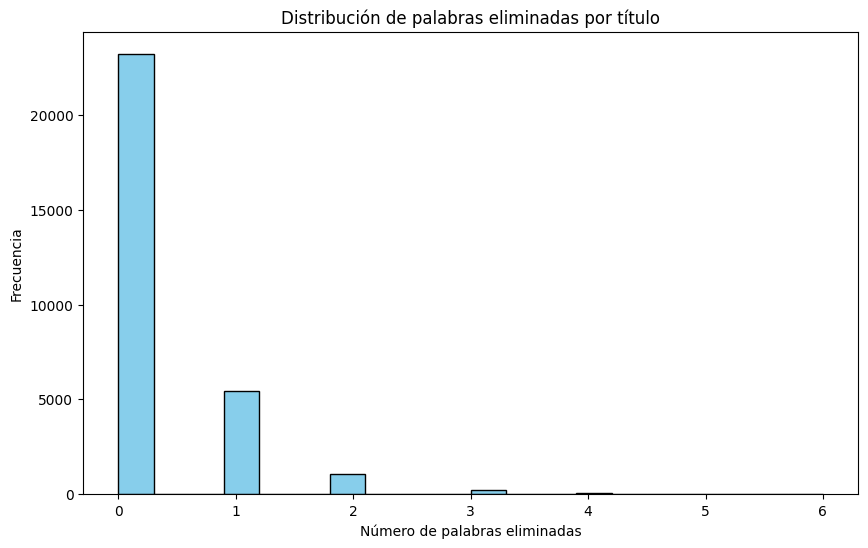

In [24]:
# Comparar longitud antes y después de eliminar stop words
df['original_length'] = df['tokens'].apply(len)
df['filtered_length'] = df['filtered_tokens'].apply(len)

# Calcular palabras eliminadas
df['removed_words'] = df['original_length'] - df['filtered_length']

# Estadísticas descriptivas
average_removed = df['removed_words'].mean()
percentage_reduction = (average_removed / df['original_length'].mean()) * 100

# Mostrar resultados
print(f"Promedio de palabras eliminadas: {average_removed:.2f}")
print(f"Porcentaje de reducción en el tamaño de los tokens: {percentage_reduction:.2f}%")

# Distribución de palabras eliminadas
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['removed_words'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribución de palabras eliminadas por título")
plt.xlabel("Número de palabras eliminadas")
plt.ylabel("Frecuencia")
plt.show()

### Justificación para la eliminación de Stop Words

1. **Reducción de ruido semántico**:
   - Las stop words, como "de", "para", "e" (en portugués), son palabras comunes que no aportan información significativa para identificar similitudes entre productos.
   - Su presencia puede generar relaciones artificiales entre títulos que comparten conectores pero no son realmente similares.

2. **Foco en términos clave**:
   - Al eliminar las stop words, el análisis se concentra en palabras relevantes como nombres de productos, categorías, y características distintivas.
   - Esto mejora la precisión al identificar títulos con contenido semántico significativo.

3. **Minimización de similitudes irreales**:
   - Títulos como `"Tenis de homem"` y `"Bicicleta para mulher"` comparten la palabra "para", pero no tienen relación real. Al eliminar este tipo de palabras, evitamos asociaciones incorrectas.

4. **Impacto controlado**:
   - Aunque la eliminación de stop words reduce el tamaño de los tokens en solo un **5.18%**, elimina un promedio de **0.38 palabras por título**, lo que ayuda a reducir ruido sin afectar significativamente el contenido útil.

**Conclusión**:
- La eliminación de stop words es una estrategia clave para mejorar la precisión en la identificación de similitudes entre productos, al enfocarse en términos que realmente definen la relación entre ellos.

In [25]:
# Filtrar títulos que contengan "para" o "de"
filtered_examples = df[df['tokens'].apply(lambda x: 'para' in x or 'de' in x)]

# Mostrar algunos ejemplos
print("Ejemplos de títulos con 'para' o 'de':")
print(filtered_examples[['ITE_ITEM_TITLE', 'tokens']].head(10))

Ejemplos de títulos con 'para' o 'de':
                                        ITE_ITEM_TITLE  \
1    Tenis Para Caminhada Super Levinho Spider Corr...   
10   Sapatilha Bike Absolute Nero Mtb Para Pedal Cl...   
21   Tenis Feminino De Fazer Caminhada Corrida Acad...   
33   Tenis  Sneacker Feminino Surfista  Cheia De Ma...   
42   Tenis De Menino Bota Com Luz De Led Sapato Pre...   
60   Ténis Estilo All Star Cano Alto Masculino De C...   
69   Bicicleta Infantil Kls Blue Girls Aro 16 Rodas...   
74   3pcs Mini Clubes De Golfe Caneta Esferográfica...   
94   Tênis Sapatênis Feminino Anabela Casual Confor...   
100  //kit 2 Pares De Tênis Fé Estiloso De Perfeita...   

                                                tokens  
1    [tenis, para, caminhada, super, levinho, spide...  
10   [sapatilha, bike, absolute, nero, mtb, para, p...  
21   [tenis, feminino, de, fazer, caminhada, corrid...  
33   [tenis, sneacker, feminino, surfista, cheia, d...  
42   [tenis, de, menino, bota, com, l

### Validación de la hipótesis: Minimización de similitudes irreales

**Ejemplos analizados**:
- Títulos con palabras comunes como "para" o "de" incluyen:
  - `"Tenis Para Caminhada Super Levinho Spider Corrida"`
  - `"Sapatilha Bike Absolute Nero Mtb Para Pedal Clip"`
  - `"Tenis Feminino De Fazer Caminhada Corrida Academia"`
  - `"Tenis Sneacker Feminino Surfista Cheia De Marca"`
  - `"Tenis De Menino Bota Com Luz De Led Sapato Preto"`

**Observaciones**:
1. **Patrón recurrente de conectores comunes**:
   - Palabras como "para" y "de" aparecen en múltiples títulos, sin aportar información semántica relevante.
   - Ejemplo: `"Tenis Para Caminhada"` y `"Bicicleta Para Mulher"` comparten "para", pero representan productos completamente diferentes.

2. **Ruido en la similitud**:
   - La presencia de estas palabras puede llevar a similitudes artificiales entre títulos que no tienen una relación real, al estar basadas únicamente en palabras comunes.

**Conclusión**:
Eliminar palabras comunes como "para" y "de" mejora la precisión al calcular similitudes entre productos, al reducir el ruido semántico y enfocar el análisis en términos clave.

# Vectorización, similitud usando TF-IDF 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Unir tokens en un solo texto para cada título
df['filtered_text'] = df['filtered_tokens'].apply(lambda x: ' '.join(x))

# Crear la matriz TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['filtered_text'])

print("Matriz TF-IDF generada con forma:", tfidf_matrix.shape)

Matriz TF-IDF generada con forma: (30000, 15898)


In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import Parallel, delayed
import sparse
from tqdm import tqdm

def calculate_similarities_batch(df, batch_size=500, threshold=0.5):
    """
    Calcula similitudes de manera optimizada usando procesamiento por lotes
    y filtrado por umbral.
    
    Args:
        df (pd.DataFrame): DataFrame con los títulos
        batch_size (int): Tamaño del lote para procesar
        threshold (float): Umbral mínimo de similitud para guardar
        
    Returns:
        pd.DataFrame: DataFrame con las similitudes filtradas
    """
    # Vectorización más eficiente con menos features
    tfidf_vectorizer = TfidfVectorizer(
        max_features=5000,  # Limitar características
        min_df=2  # Ignorar términos que aparecen solo una vez
    )
    
    print("Vectorizando textos...")
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['ITE_ITEM_TITLE'])
    
    # Usar SVD solo si es necesario (muchas características)
    if tfidf_matrix.shape[1] > 1000:
        print("Aplicando reducción de dimensionalidad...")
        svd = TruncatedSVD(n_components=min(100, tfidf_matrix.shape[1]-1))
        reduced_matrix = svd.fit_transform(tfidf_matrix)
    else:
        reduced_matrix = tfidf_matrix.toarray()
    
    n_samples = len(df)
    results = []
    
    print("Calculando similitudes por lotes...")
    for i in tqdm(range(0, n_samples, batch_size)):
        batch_end = min(i + batch_size, n_samples)
        # Calcular similitud solo para el lote actual
        batch_similarities = cosine_similarity(
            reduced_matrix[i:batch_end],
            reduced_matrix
        )
        
        # Procesar solo similitudes sobre el umbral
        for batch_idx, row in enumerate(batch_similarities):
            abs_idx = i + batch_idx
            # Solo procesar la mitad superior de la matriz
            high_similarities = np.where(row[abs_idx+1:] > threshold)[0]
            
            for j in high_similarities:
                j = j + abs_idx + 1  # Ajustar índice
                results.append([
                    df.iloc[abs_idx]['ITE_ITEM_TITLE'],
                    df.iloc[j]['ITE_ITEM_TITLE'],
                    row[j]
                ])
    
    # Crear DataFrame con resultados filtrados
    similarity_df = pd.DataFrame(
        results,
        columns=['ITE_ITEM_TITLE_1', 'ITE_ITEM_TITLE_2', 'Score Similitud']
    )
    
    return similarity_df.sort_values('Score Similitud', ascending=False)

similarity_df = calculate_similarities_batch(df, batch_size=1000, threshold=0.5)

similarity_df

Vectorizando textos...
Aplicando reducción de dimensionalidad...
Calculando similitudes por lotes...


100%|██████████| 30/30 [04:06<00:00,  8.22s/it]


,ITE_ITEM_TITLE_1,ITE_ITEM_TITLE_2,Score Similitud
4022061,Tênis Via Marte Feminino Nobuck Preto,Tênis Via Marte Nobuck Feminino - Preto,1.0
481516,Tenis Branco Napa Feminino Beira Rio Confortav...,Tenis Branco Napa Feminino Beira Rio Confortav...,1.0
3422084,Mizuno Pro7,Mizuno Waze,1.0
7189610,Tênis Fila Cage Python Masculino - Preto Vermelho,Tênis Fila Cage Python Masculino Preto/vermelho,1.0
4876003,Tenis Feminino Casual Via Marte 20-13509,Tenis Feminino Casual Via Marte 20-6902,1.0
...,...,...,...
2983019,Tenis Usaflex Salto 3 Cm Elastico - Ac6601 Nude,Tenis Sapatilha Hibrido Neoprene Nautika Ntk P...,0.5
616926,Tenis Feminino Casual Original Vicerinne Black...,Promoção Tenis Casual Torricella Original,0.5
3286246,Bicicleta Infantil Aro 12 Veloz Nathor + Buzin...,Bicicleta Cannondale Lefty Scalpel Worldcup Qu...,0.5
98637,Sapatilha Tênis Neoprene Ciclismo Surf Academi...,Tenis Feminino Sapatilha Angel Leve Academia S...,0.5


Se establece un threshold de 0.5, para no procesar toda la matrix.